In [538]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import copy

In [539]:
df = pd.read_csv('CO2_Emissions.csv')
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [540]:
df = df[['Engine Size(L)','CO2 Emissions(g/km)']]
df

,Engine Size(L),CO2 Emissions(g/km)
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
7380,2.0,219
7381,2.0,232
7382,2.0,240
7383,2.0,232


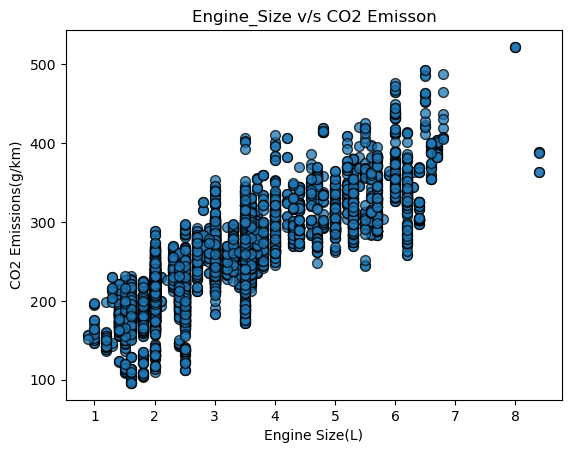

In [541]:
plt.title('Engine_Size v/s CO2 Emisson')
plt.scatter(df['Engine Size(L)'] ,df['CO2 Emissions(g/km)'] , s=50, edgecolors='black', linewidths=1, alpha = 0.75)
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()

In [542]:
x = np.array(df['Engine Size(L)'])
y = np.array(df['CO2 Emissions(g/km)'])

In [543]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Training Data:", x_train.shape, y_train.shape)
print("Testing Data:", x_test.shape, y_test.shape)

Training Data: (5908,) (5908,)
Testing Data: (1477,) (1477,)


In [544]:
def compute_cost(x, y, w, b):
    
    m  = x.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost  

In [545]:
initial_w = np.random.randn()
initial_b = np.random.randn()

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(f'Cost at initial w: {cost:.3f}')

Cost at initial w: 33332.302


In [546]:
def compute_gradient(x, y, w, b): 

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [547]:
initial_w = np.random.randn()
initial_b = np.random.randn()

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -885.6604612138906 -257.2663598342022


In [548]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
# number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b)  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [549]:
initial_w = np.random.randn()
initial_b = np.random.randn()

# some gradient descent settings
iterations = 4000
alpha = 0.01 / (1 + 0.0001 * iterations)

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 27521.76   
Iteration  400: Cost   930.02   
Iteration  800: Cost   670.98   
Iteration 1200: Cost   558.08   
Iteration 1600: Cost   508.87   
Iteration 2000: Cost   487.43   
Iteration 2400: Cost   478.08   
Iteration 2800: Cost   474.01   
Iteration 3200: Cost   472.23   
Iteration 3600: Cost   471.46   
w,b found by gradient descent: 37.1065254253541 133.22598854909575


In [550]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Engine Size(L)')

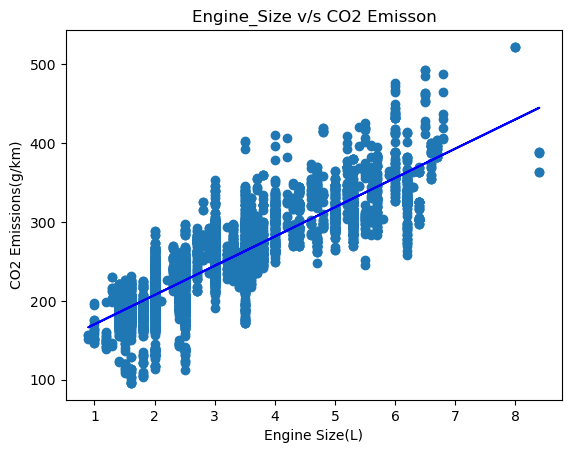

In [551]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train) 

plt.title('Engine_Size v/s CO2 Emisson')
# Set the y-axis label
plt.ylabel('CO2 Emissions(g/km)')
# Set the x-axis label
plt.xlabel('Engine Size(L)')

In [552]:
m1 = x_test.shape[0]
y_pred = np.zeros(m1)

for j in range(m1):
    y_pred[j] = w * x_test[j] + b

In [553]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.7242297713843487
